## Seaborn Pair Ranking

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

train = pd.read_csv("data/train.csv", dtype={"Age": np.float64}, )
print(train.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Replacing missing ages with median
train["Age"] = train["Age"].fillna(train["Age"].median())
train["ParentsAndChildren"] = train["Parch"]
train["SiblingsAndSpouses"] = train["SibSp"]
 
#train["Survived"][train["Survived"]==1] = "Survived"
#train["Survived"][train["Survived"]==0] = "Died"

# Replace all the occurences of male with the number 0.
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1
# Find all the unique values for "Embarked".

train["Embarked"] = train["Embarked"].fillna("S")
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

In [3]:
#plt.figure()
data=train[["Fare","Survived","Age","ParentsAndChildren","SiblingsAndSpouses","Pclass","Embarked"]]
#sns.pairplot(data,hue="Survived", dropna=True)
#plt.savefig("1_seaborn_pair_plot.png")
data.tail()

,Fare,Survived,Age,ParentsAndChildren,SiblingsAndSpouses,Pclass,Embarked
886,13.00,0,27,0,0,2,0
887,30.00,1,19,0,0,1,0
888,23.45,0,28,2,1,3,0
889,30.00,1,26,0,0,1,1
890,7.75,0,32,0,0,3,2


In [4]:
print(train["Cabin"].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106' 'C65'
 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91' 'E40'
 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34' 'C104'
 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79' 'E25'
 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68' 'A10'
 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58' 'C126'
 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90' 'C45'
 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6' 'B82 B84'
 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50' 'B42' 'C148']


In [5]:
import re
import pandas

# A function to get the title from a name.
def get_cabin_section(cabin):
    # Use a regular expression to search for the cabin data.
    cabin_search = re.search('([A-Za-z]+)', cabin)
    # If the cabin_search exists, extract and return it.
    if cabin_search:
        return cabin_search.group(1)
    return "N"


In [6]:
# Get all the cabin sections
cabin_data = []
train["Cabin"] = train["Cabin"].fillna("N0")
cabin_section = train["Cabin"].apply(get_cabin_section)


In [8]:
print(cabin_section.head())

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
section_mapping = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G":7,"T":8, "N": 0}
for k,v in section_mapping.items():
    cabin_section[cabin_section == k] = v

#train["CabinSection"] = cabin_section



0    0
1    3
2    0
3    3
4    0
Name: Cabin, dtype: object


In [9]:
train["CabinSection"] = cabin_section
print(train.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   0   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   1   38      1      0   
2                             Heikkinen, Miss. Laina   1   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   1   35      1      0   
4                           Allen, Mr. William Henry   0   35      0      0   

             Ticket     Fare Cabin Embarked  ParentsAndChildren  \
0         A/5 21171   7.2500    N0        0                   0   
1          PC 17599  71.2833   C85        1                   0   
2  STON/O2. 3101282   7.9250    N0        0                   0   
3            113803  53.1000  C123      

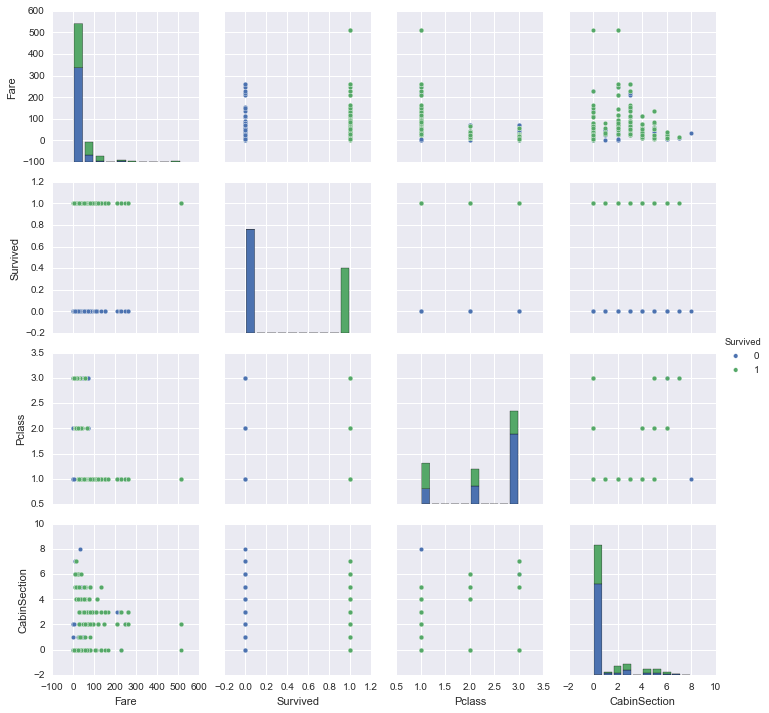

In [11]:
%matplotlib inline
plt.figure()
sns.pairplot(data=train[["Fare","Survived","Pclass","CabinSection"]],
             hue="Survived", dropna=True)
#plt.savefig("1_seaborn_pair_plot.png")
